In [1]:
import pandas as pd

data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')

ignore_index 可以让索引连续编号。

In [2]:
data_all = pd.concat(
    [data_train, data_test], axis=0, ignore_index=True, sort=False)
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 选的都是离散型特征

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("bmh")
plt.rc('font', family='SimHei', size=13)
cat_list = [
    'Pclass', 'Name', 'Sex', 'SibSp', 'Embarked', 'Parch', 'Ticket', 'Cabin'
]
for index, col_name in enumerate(cat_list):
    Cabin_cat_num = len(data_all[col_name].value_counts().index)
    print('{0}. {1} 特征的类型数量是: {2}'.format(index + 1, col_name, Cabin_cat_num))

1. Pclass 特征的类型数量是: 3
2. Name 特征的类型数量是: 1307
3. Sex 特征的类型数量是: 2
4. SibSp 特征的类型数量是: 7
5. Embarked 特征的类型数量是: 3
6. Parch 特征的类型数量是: 8
7. Ticket 特征的类型数量是: 929
8. Cabin 特征的类型数量是: 186


### 5 个少的特征可以可视化。

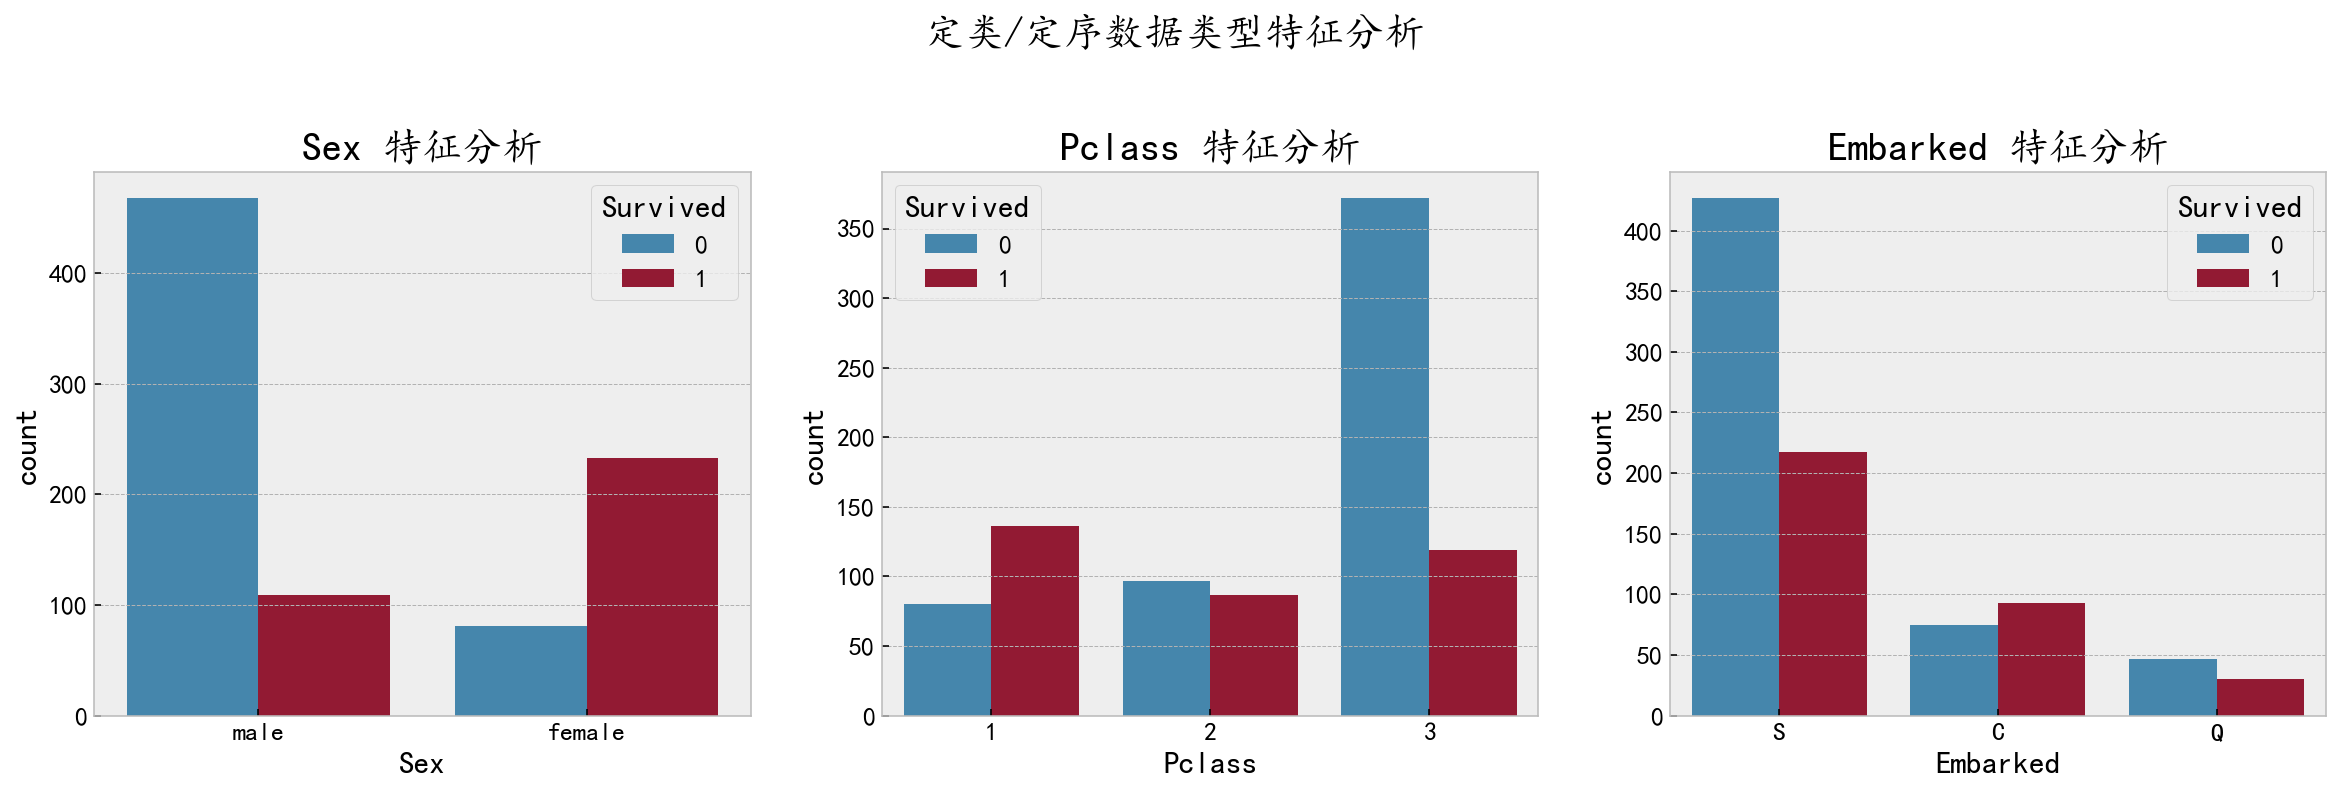

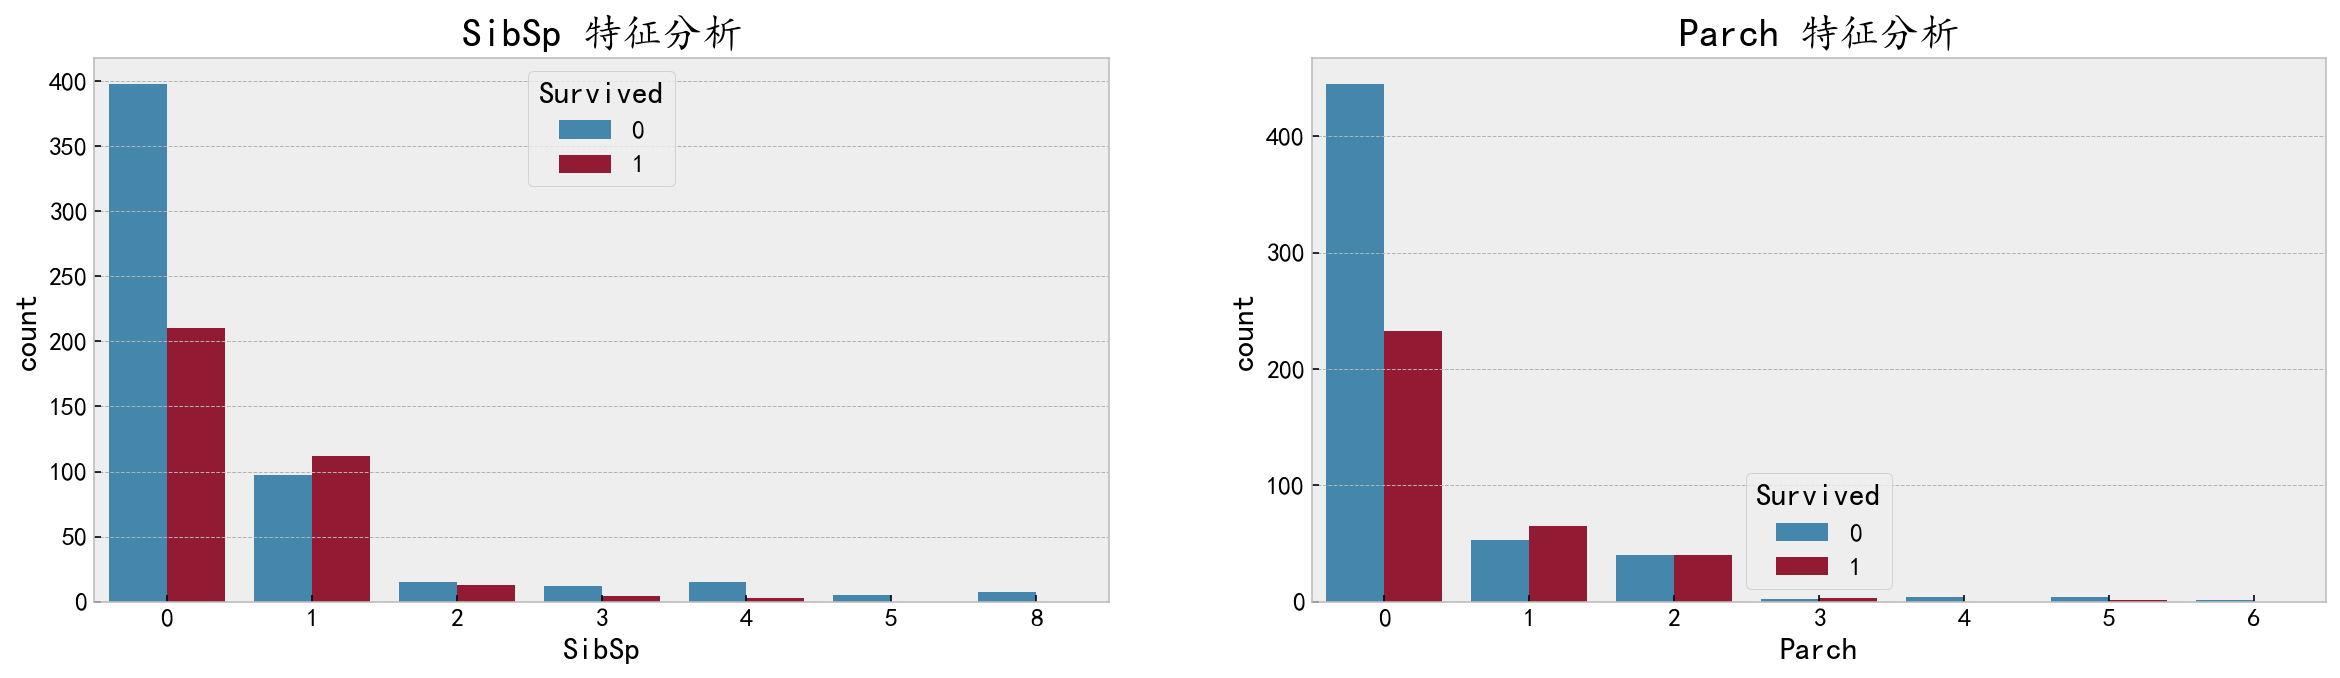

In [4]:
# 离散型变量用 countplot 就可以了
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Users/liwei/Library/Fonts/simkai.ttf', size=20)

f, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='Sex', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Pclass', hue='Survived', data=data_train, ax=ax2)
sns.countplot(x='Embarked', hue='Survived', data=data_train, ax=ax3)
ax1.set_title('Sex 特征分析', fontproperties=font)
ax2.set_title('Pclass 特征分析', fontproperties=font)
ax3.set_title('Embarked 特征分析', fontproperties=font)
f.suptitle('定类/定序数据类型特征分析', size=20, y=1.1, fontproperties=font)

f, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x='SibSp', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=data_train, ax=ax2)
ax1.set_title('SibSp 特征分析', fontproperties=font)
ax2.set_title('Parch 特征分析', fontproperties=font)

plt.show()

在不同社会等级下，男性和女性在不同登陆港口下的数量对比。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


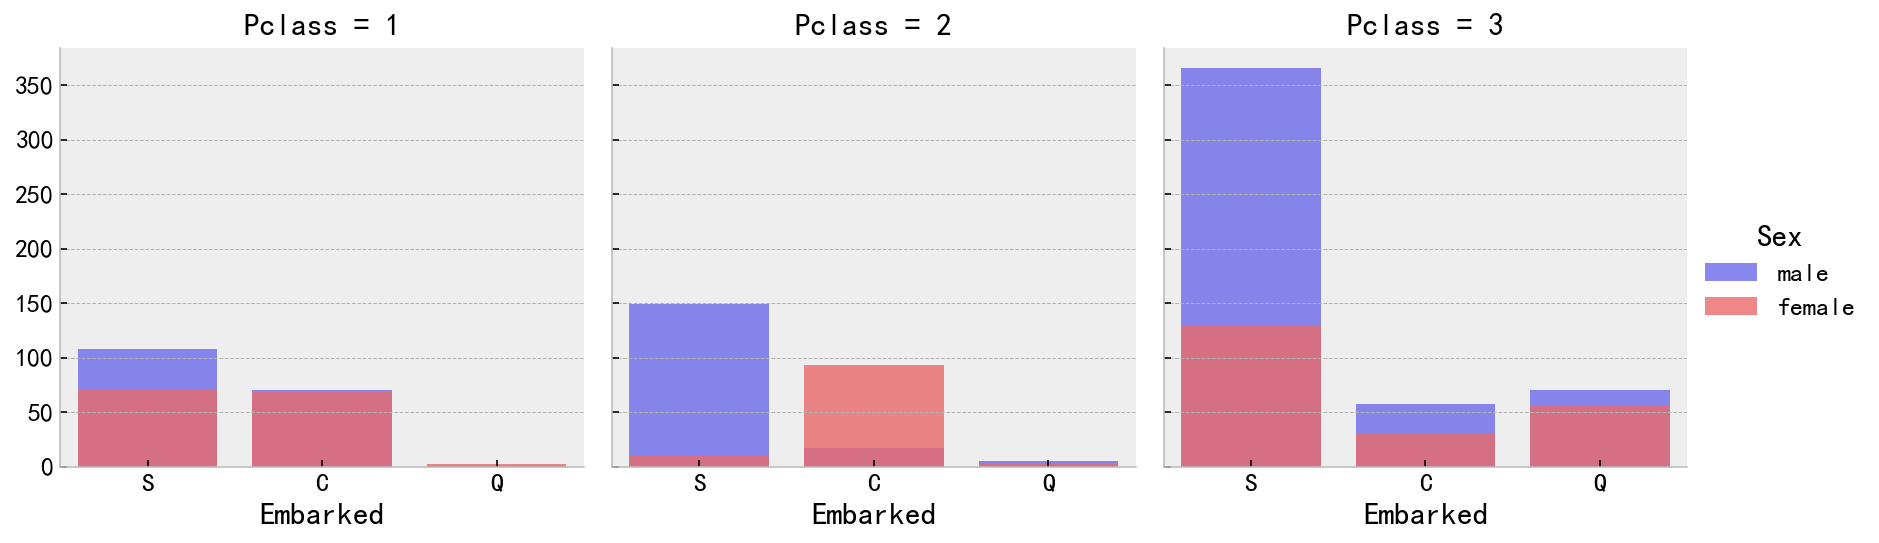

In [5]:
# 在不同社会等级下，男性和女性在不同登陆港口下的数量对比
grid = sns.FacetGrid(data_all, col='Pclass', hue='Sex', palette='seismic', size=4)
# 'Embarked' 是 data_all （是 DataFrame） 中的字段
grid.map(sns.countplot, 'Embarked', alpha=.8)
# 在图表的右边会显示图例
grid.add_legend()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


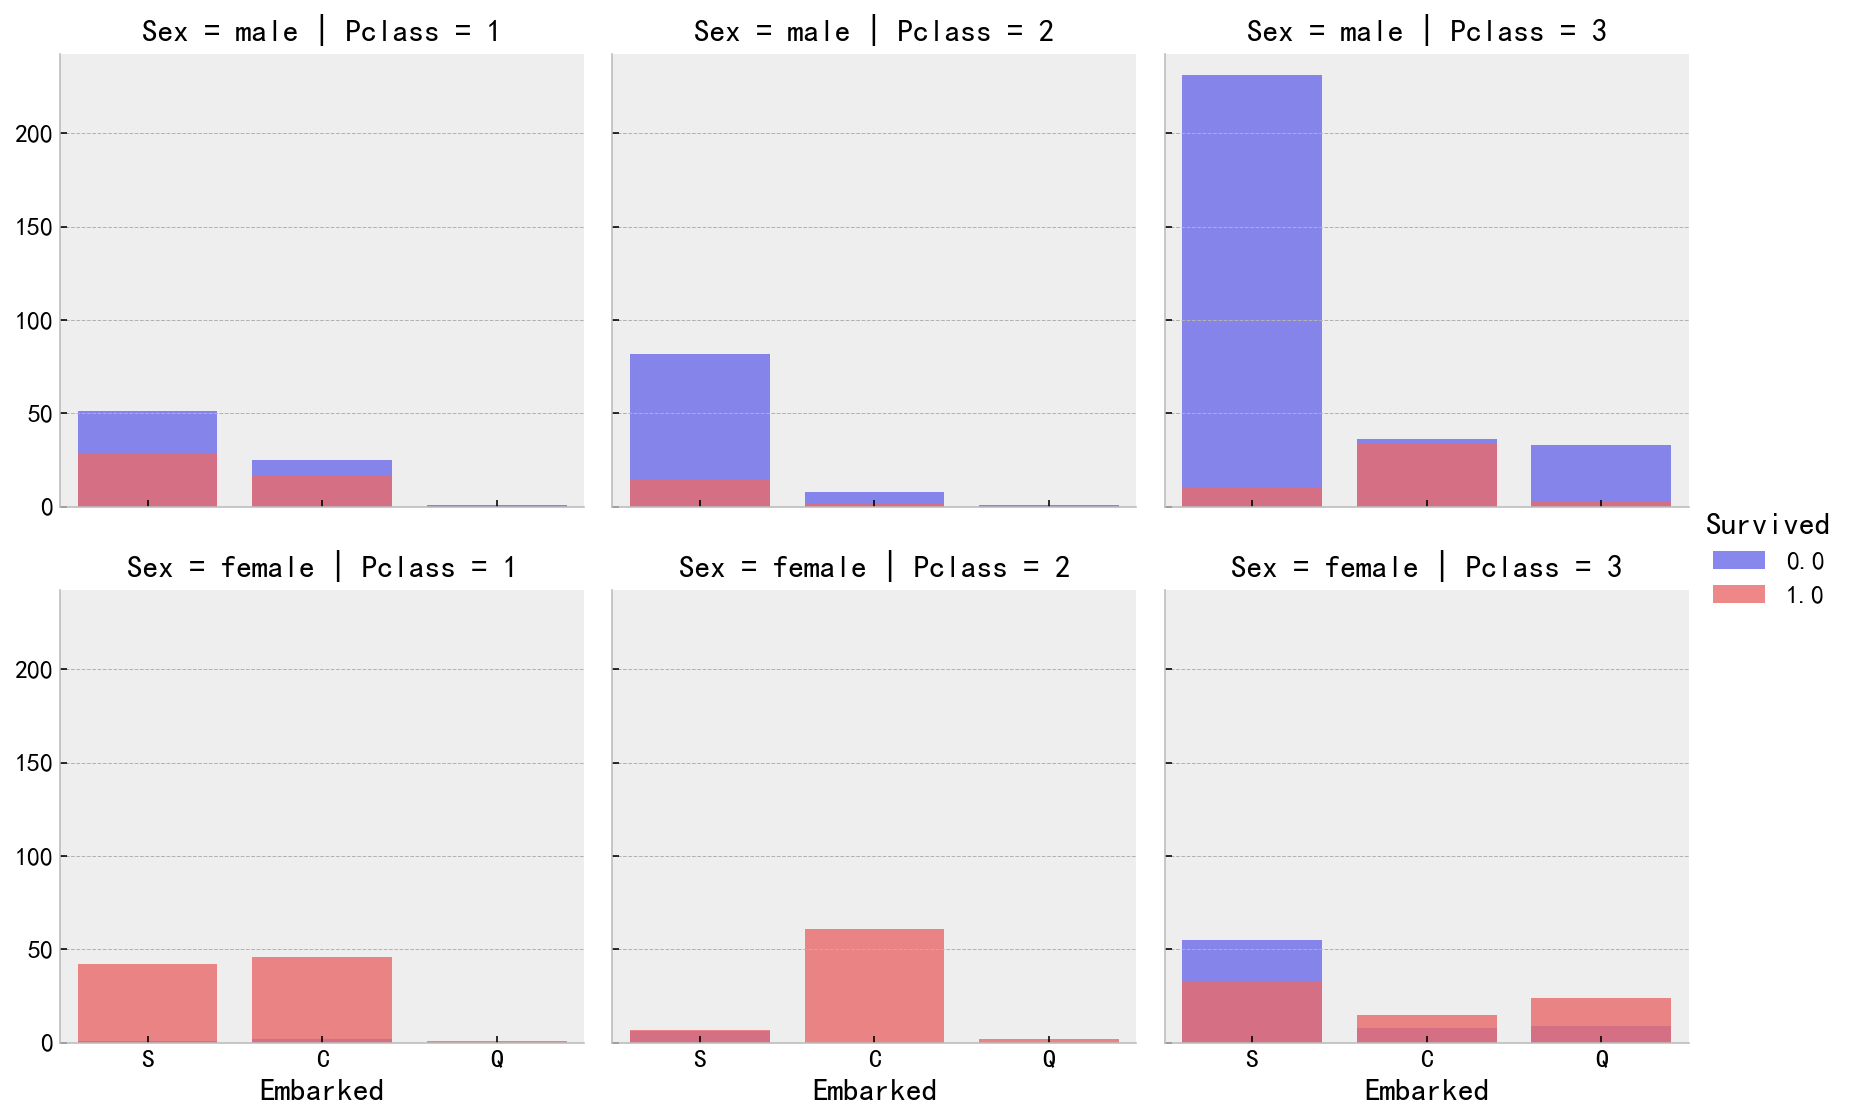

In [6]:
grid = sns.FacetGrid(data_all, row='Sex', col='Pclass',
                     hue='Survived', palette='seismic', size=4)
grid.map(sns.countplot, 'Embarked', alpha=0.8)
grid.add_legend()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Frequency')

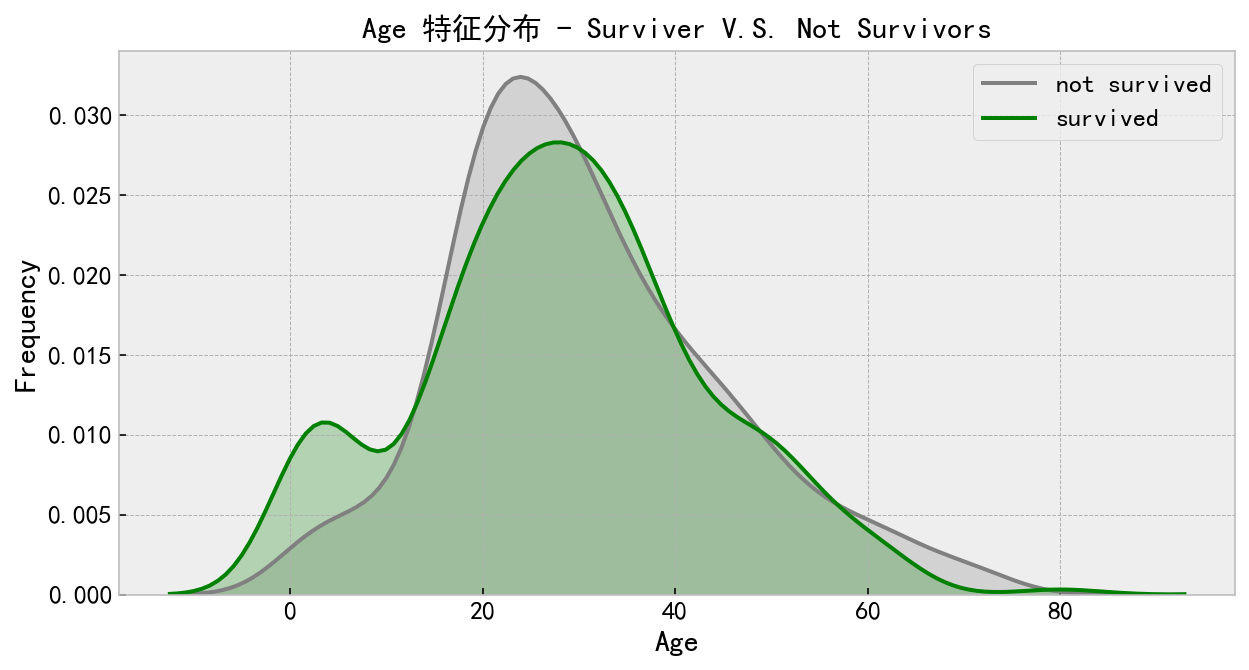

In [7]:
import matplotlib.pyplot as plt

# 在我的 notebook 里，要设置下面两行才能显示中文
plt.rcParams['font.family'] = ['sans-serif']
# 如果是在 PyCharm 里，只要下面一行，上面的一行可以删除
plt.rcParams['font.sans-serif'] = ['SimHei']

# kde 分布
f, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data_train.loc[(data_train['Survived'] == 0), 'Age'],
    color='gray',
    shade=True,
    label='not survived')
sns.kdeplot(
    data_train.loc[(data_train['Survived'] == 1), 'Age'],
    color='g',
    shade=True,
    label='survived')
plt.title('Age 特征分布 - Surviver V.S. Not Survivors', fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Frequency', fontsize=15)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


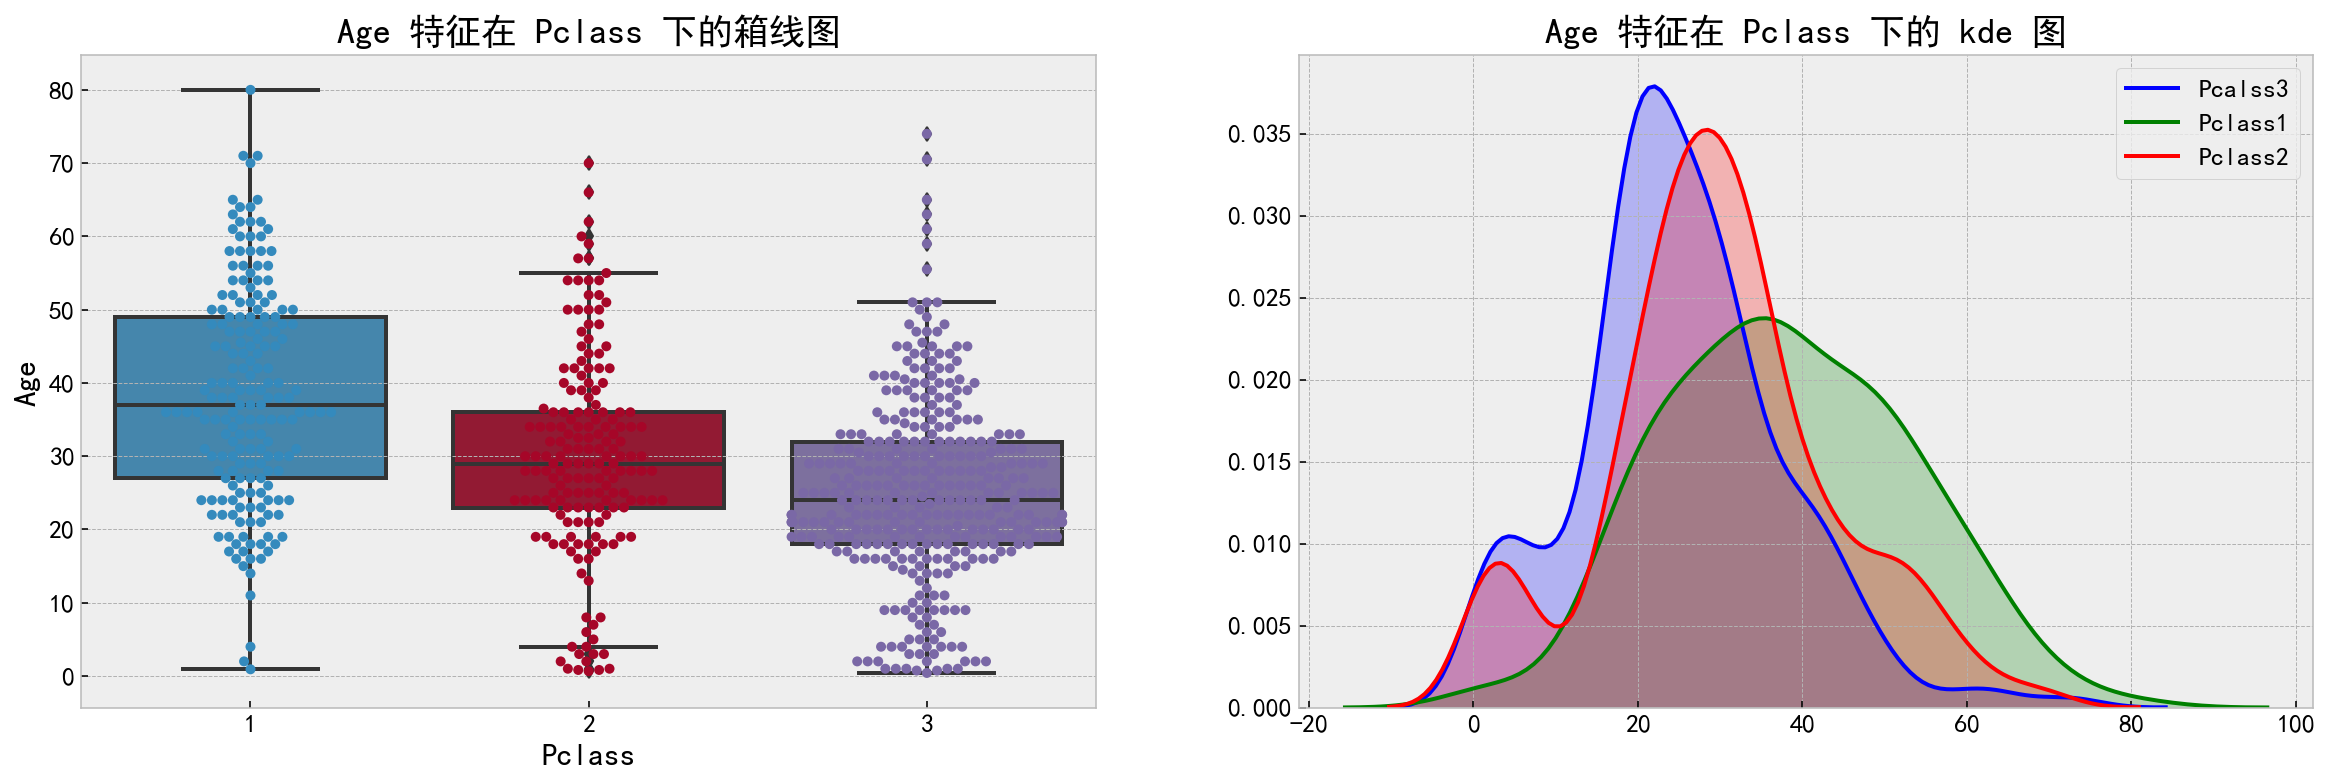

In [8]:
# 箱型图特征分析
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 6))
# 绘制箱线图
sns.boxplot(x="Pclass", y="Age", data=data_train, ax=ax1)
# 绘制点
sns.swarmplot(x="Pclass", y="Age", data=data_train, ax=ax1)
sns.kdeplot(
    data_train.loc[(data_train['Pclass'] == 3), 'Age'],
    color='b',
    shade=True,
    label='Pcalss3',
    ax=ax2)
sns.kdeplot(
    data_train.loc[(data_train['Pclass'] == 1), 'Age'],
    color='g',
    shade=True,
    label='Pclass1',
    ax=ax2)
sns.kdeplot(
    data_train.loc[(data_train['Pclass'] == 2), 'Age'],
    color='r',
    shade=True,
    label='Pclass2',
    ax=ax2)
ax1.set_title('Age 特征在 Pclass 下的箱线图', fontsize=18)
ax2.set_title("Age 特征在 Pclass 下的 kde 图", fontsize=18)
fig.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


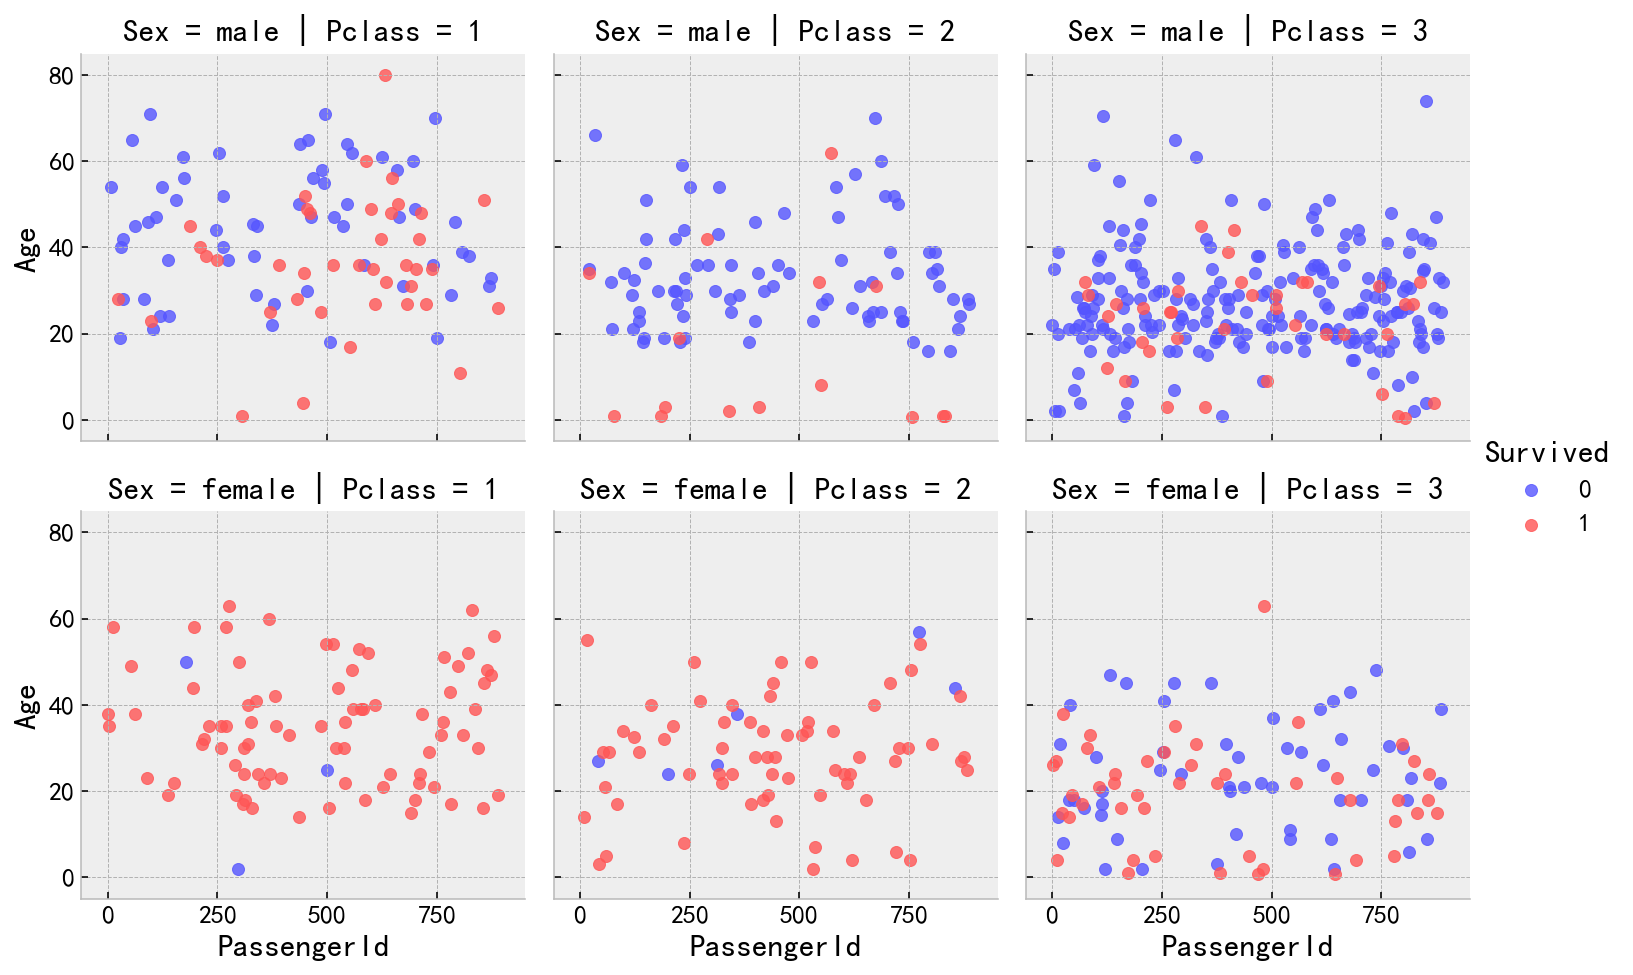

In [9]:
# Sex，Pclass 分类条件下的 Age 年龄对 Survived 的散点图
grid = sns.FacetGrid(
    data_train,
    row='Sex',
    col='Pclass',
    hue='Survived',
    palette='seismic',
    size=3.5)
grid.map(plt.scatter, 'PassengerId', 'Age', alpha=0.8)
grid.add_legend()

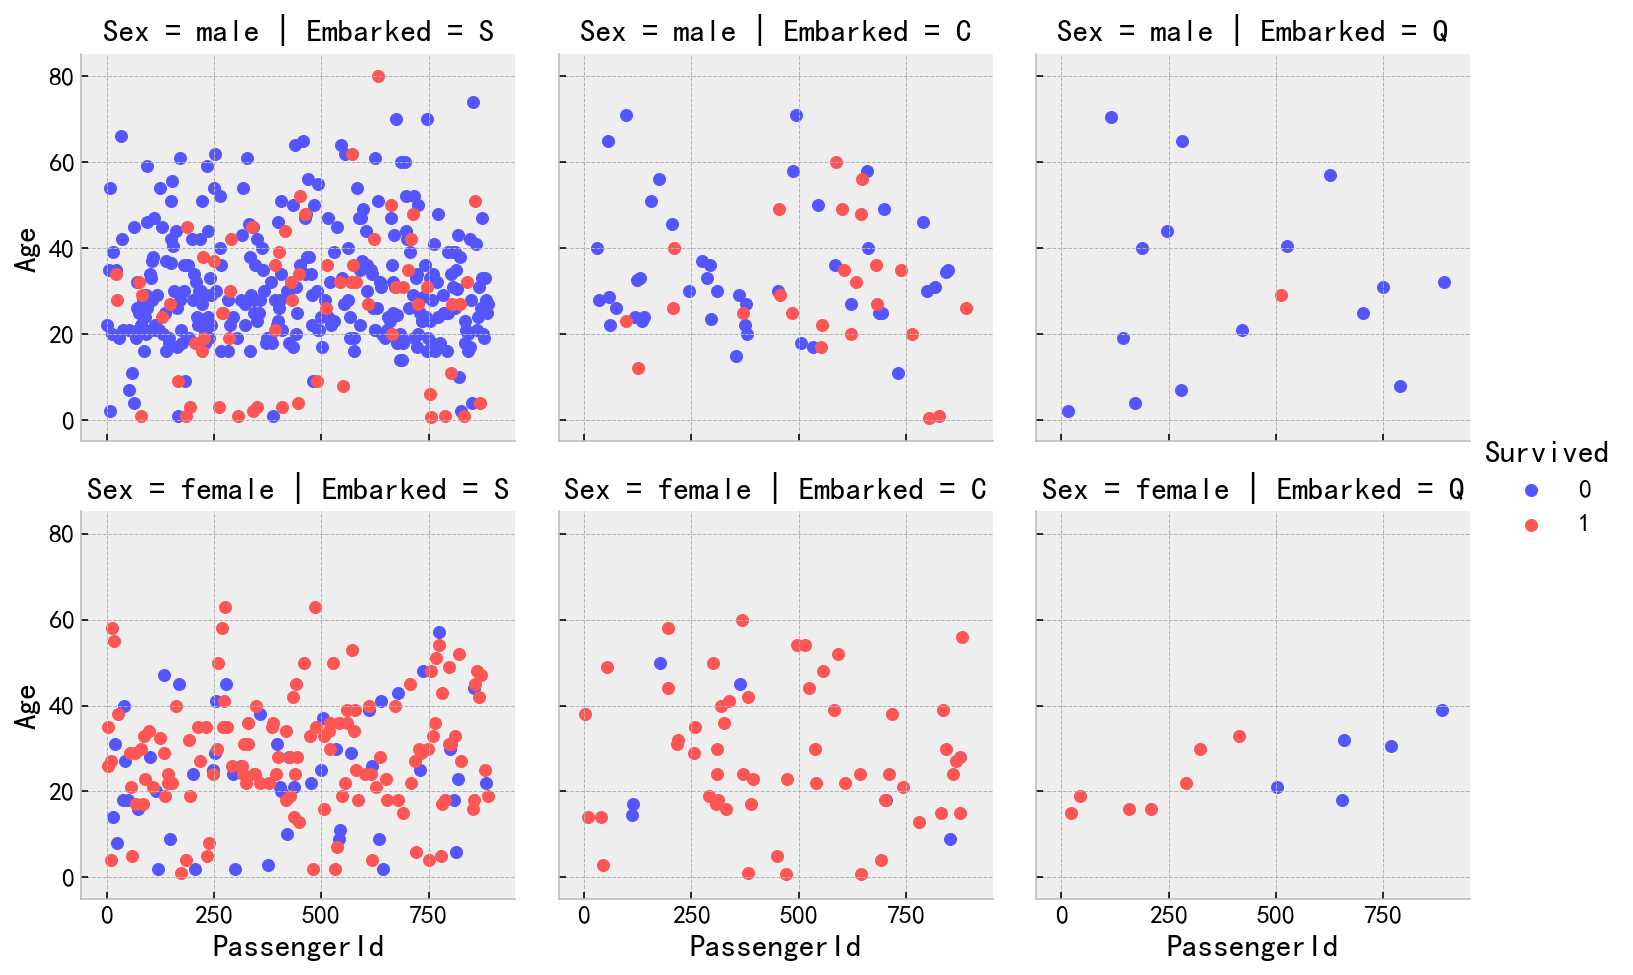

In [15]:
# Sex，Embarked 分类条件下的 Age 年龄对 Survived 的散点图
grid = sns.FacetGrid(data_train, col="Embarked", row="Sex",
                     hue="Survived", palette='seismic', height=3.5)
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

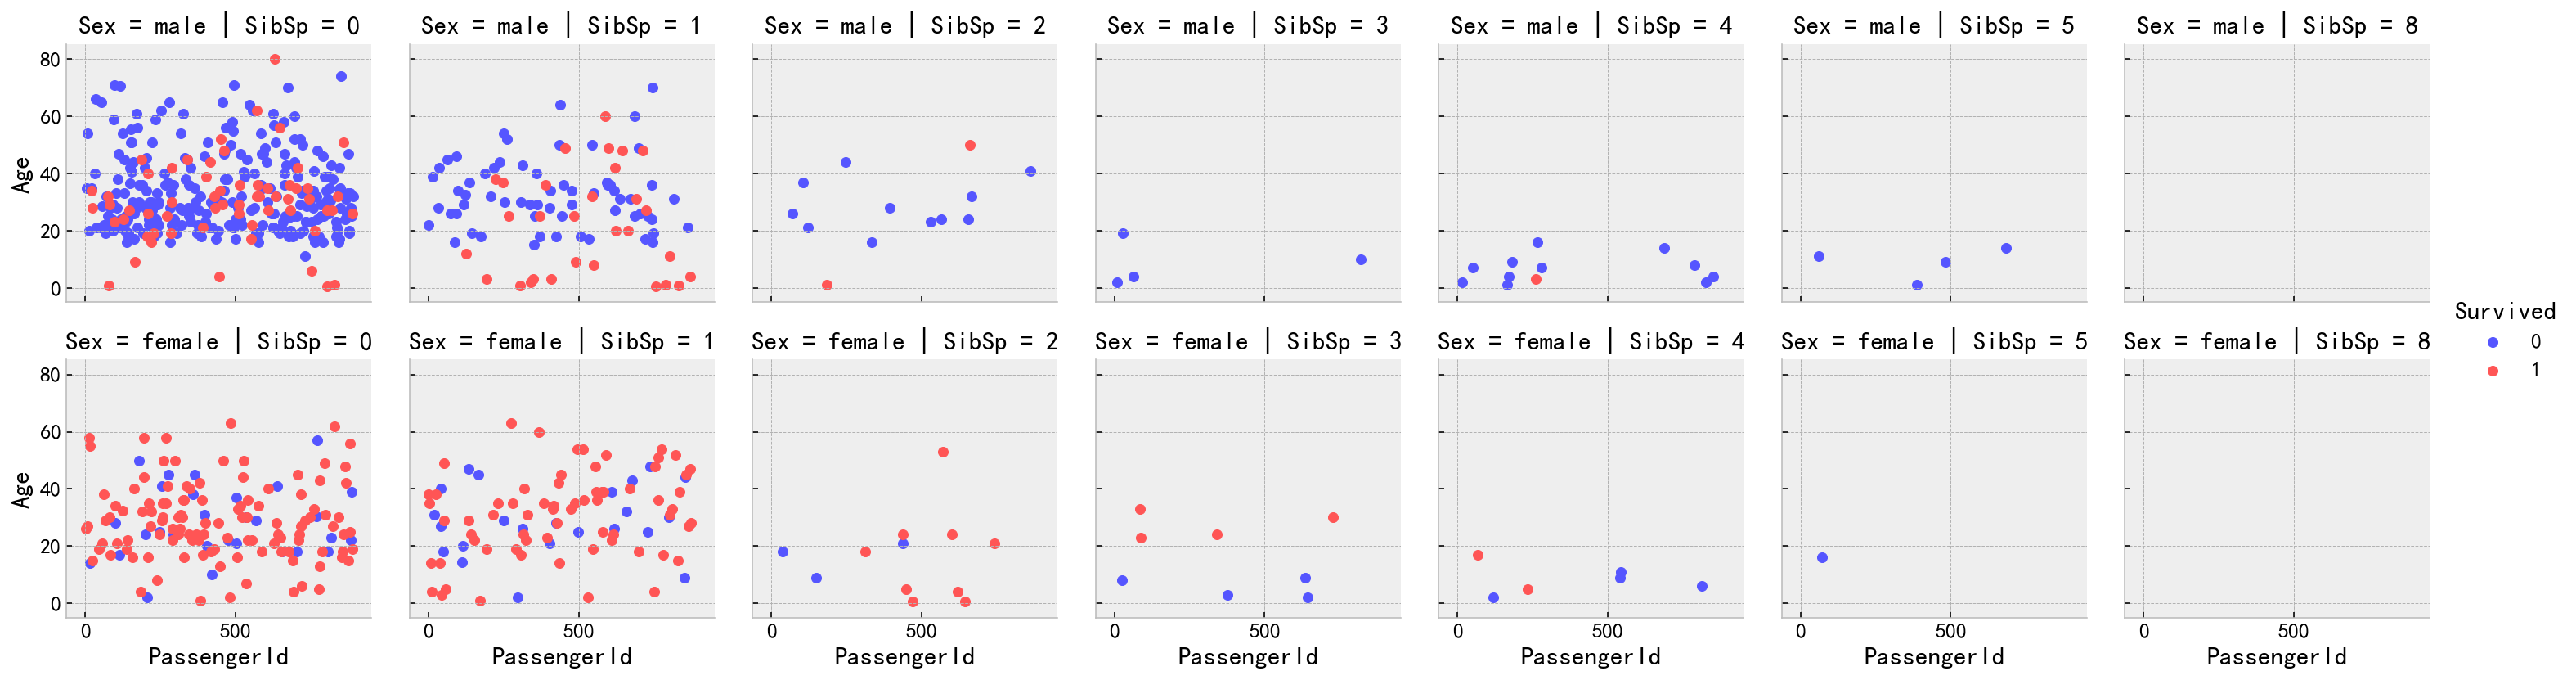

In [11]:
# Sex，SibSp 分类条件下的 Age 年龄对 Survived 的散点图
grid = sns.FacetGrid(data_train, col="SibSp", row="Sex",
                     hue="Survived", palette='seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

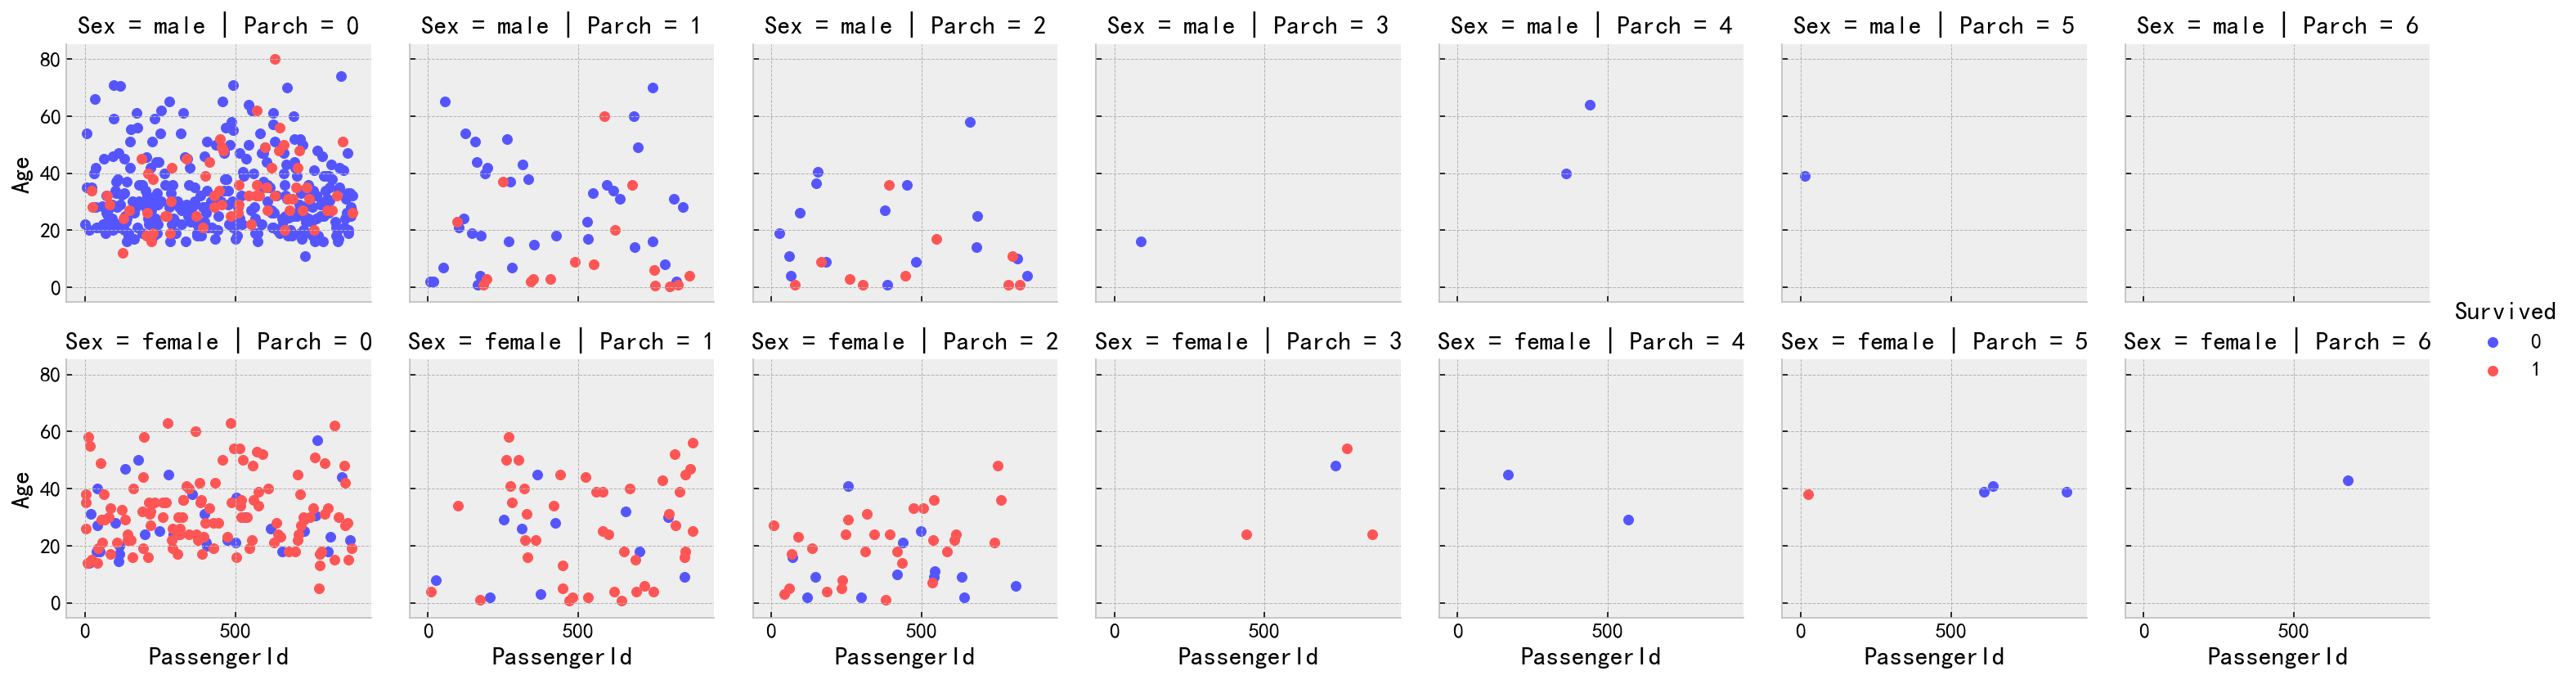

In [12]:
# Sex，Parch 分类条件下的 Age 年龄对 Survived 的散点图
grid = sns.FacetGrid(data_train, col="Parch", row="Sex",
                     hue="Survived", palette='seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

/Users/liwei/.local/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


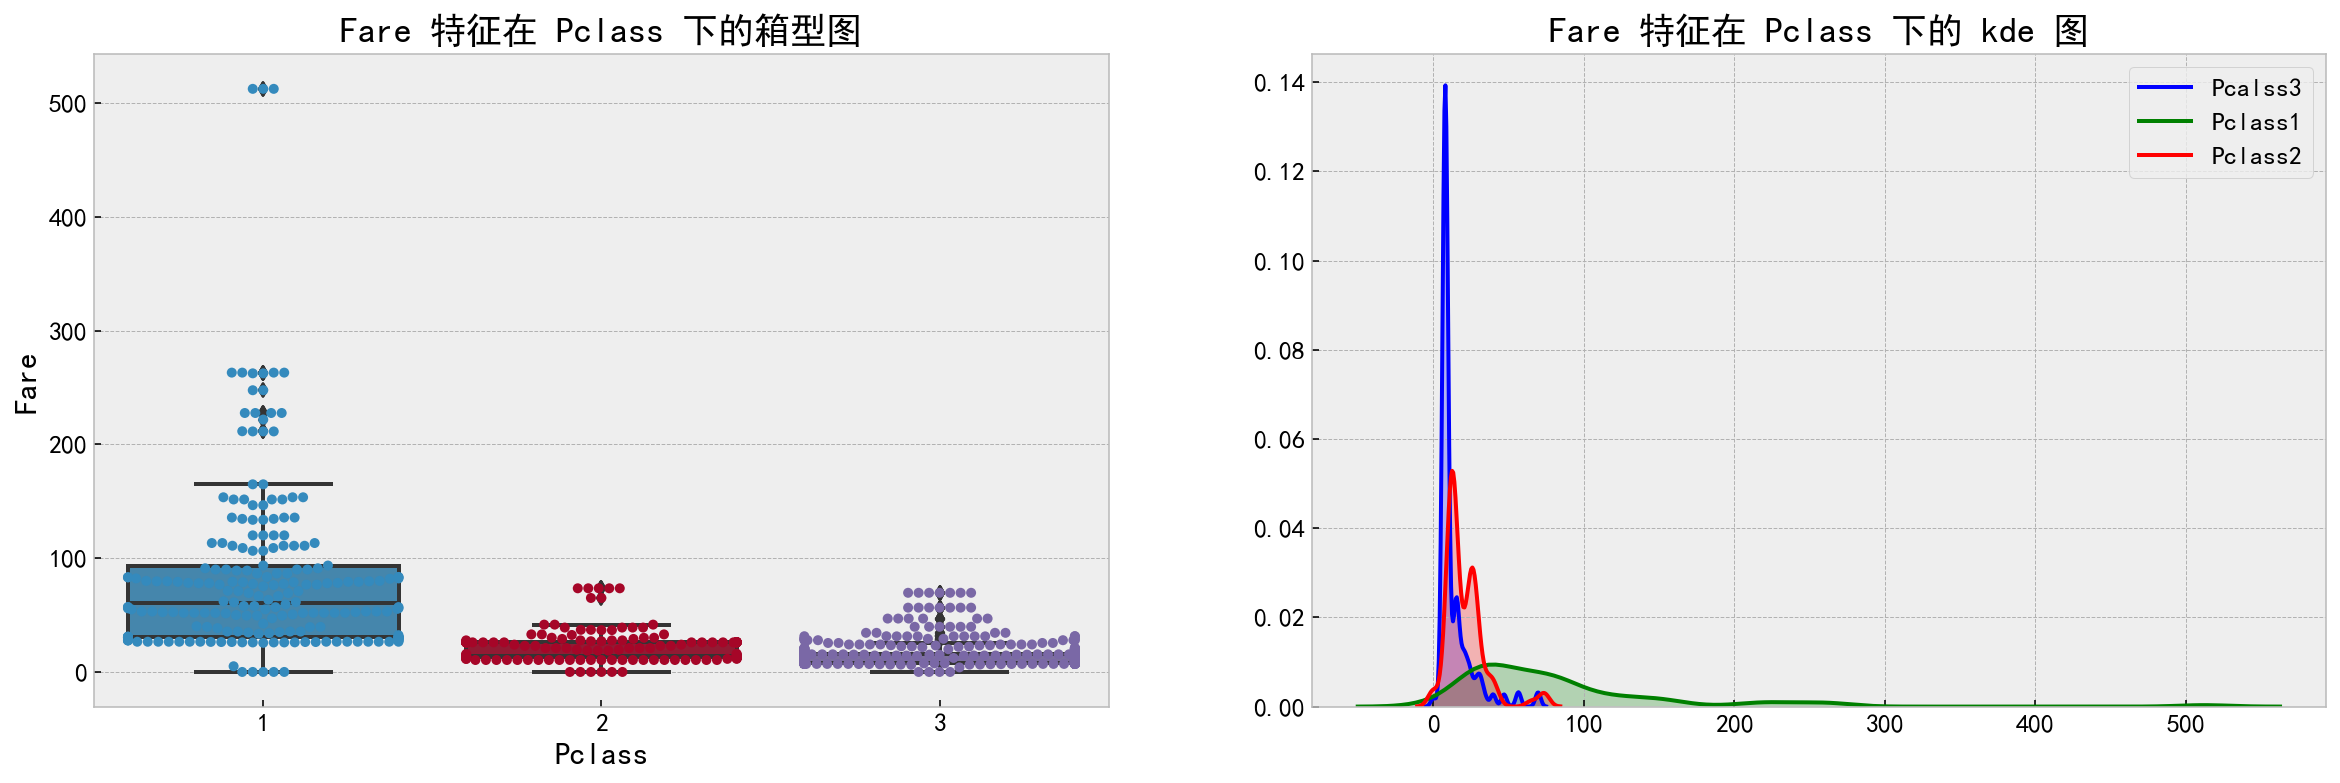

In [13]:
# 箱型图特征分析
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x="Pclass", y="Fare", data=data_train, ax =ax1)
sns.swarmplot(x="Pclass", y="Fare", data=data_train, ax =ax1)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 3),'Fare'] , color='b',shade=True, label='Pcalss3',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 1),'Fare'] , color='g',shade=True, label='Pclass1',ax=ax2)
sns.kdeplot(data_train.loc[(data_train['Pclass'] == 2),'Fare'] , color='r',shade=True, label='Pclass2',ax=ax2)
ax1.set_title('Fare 特征在 Pclass 下的箱型图', fontsize = 18)
ax2.set_title("Fare 特征在 Pclass 下的 kde 图", fontsize = 18)
fig.show()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: Runti

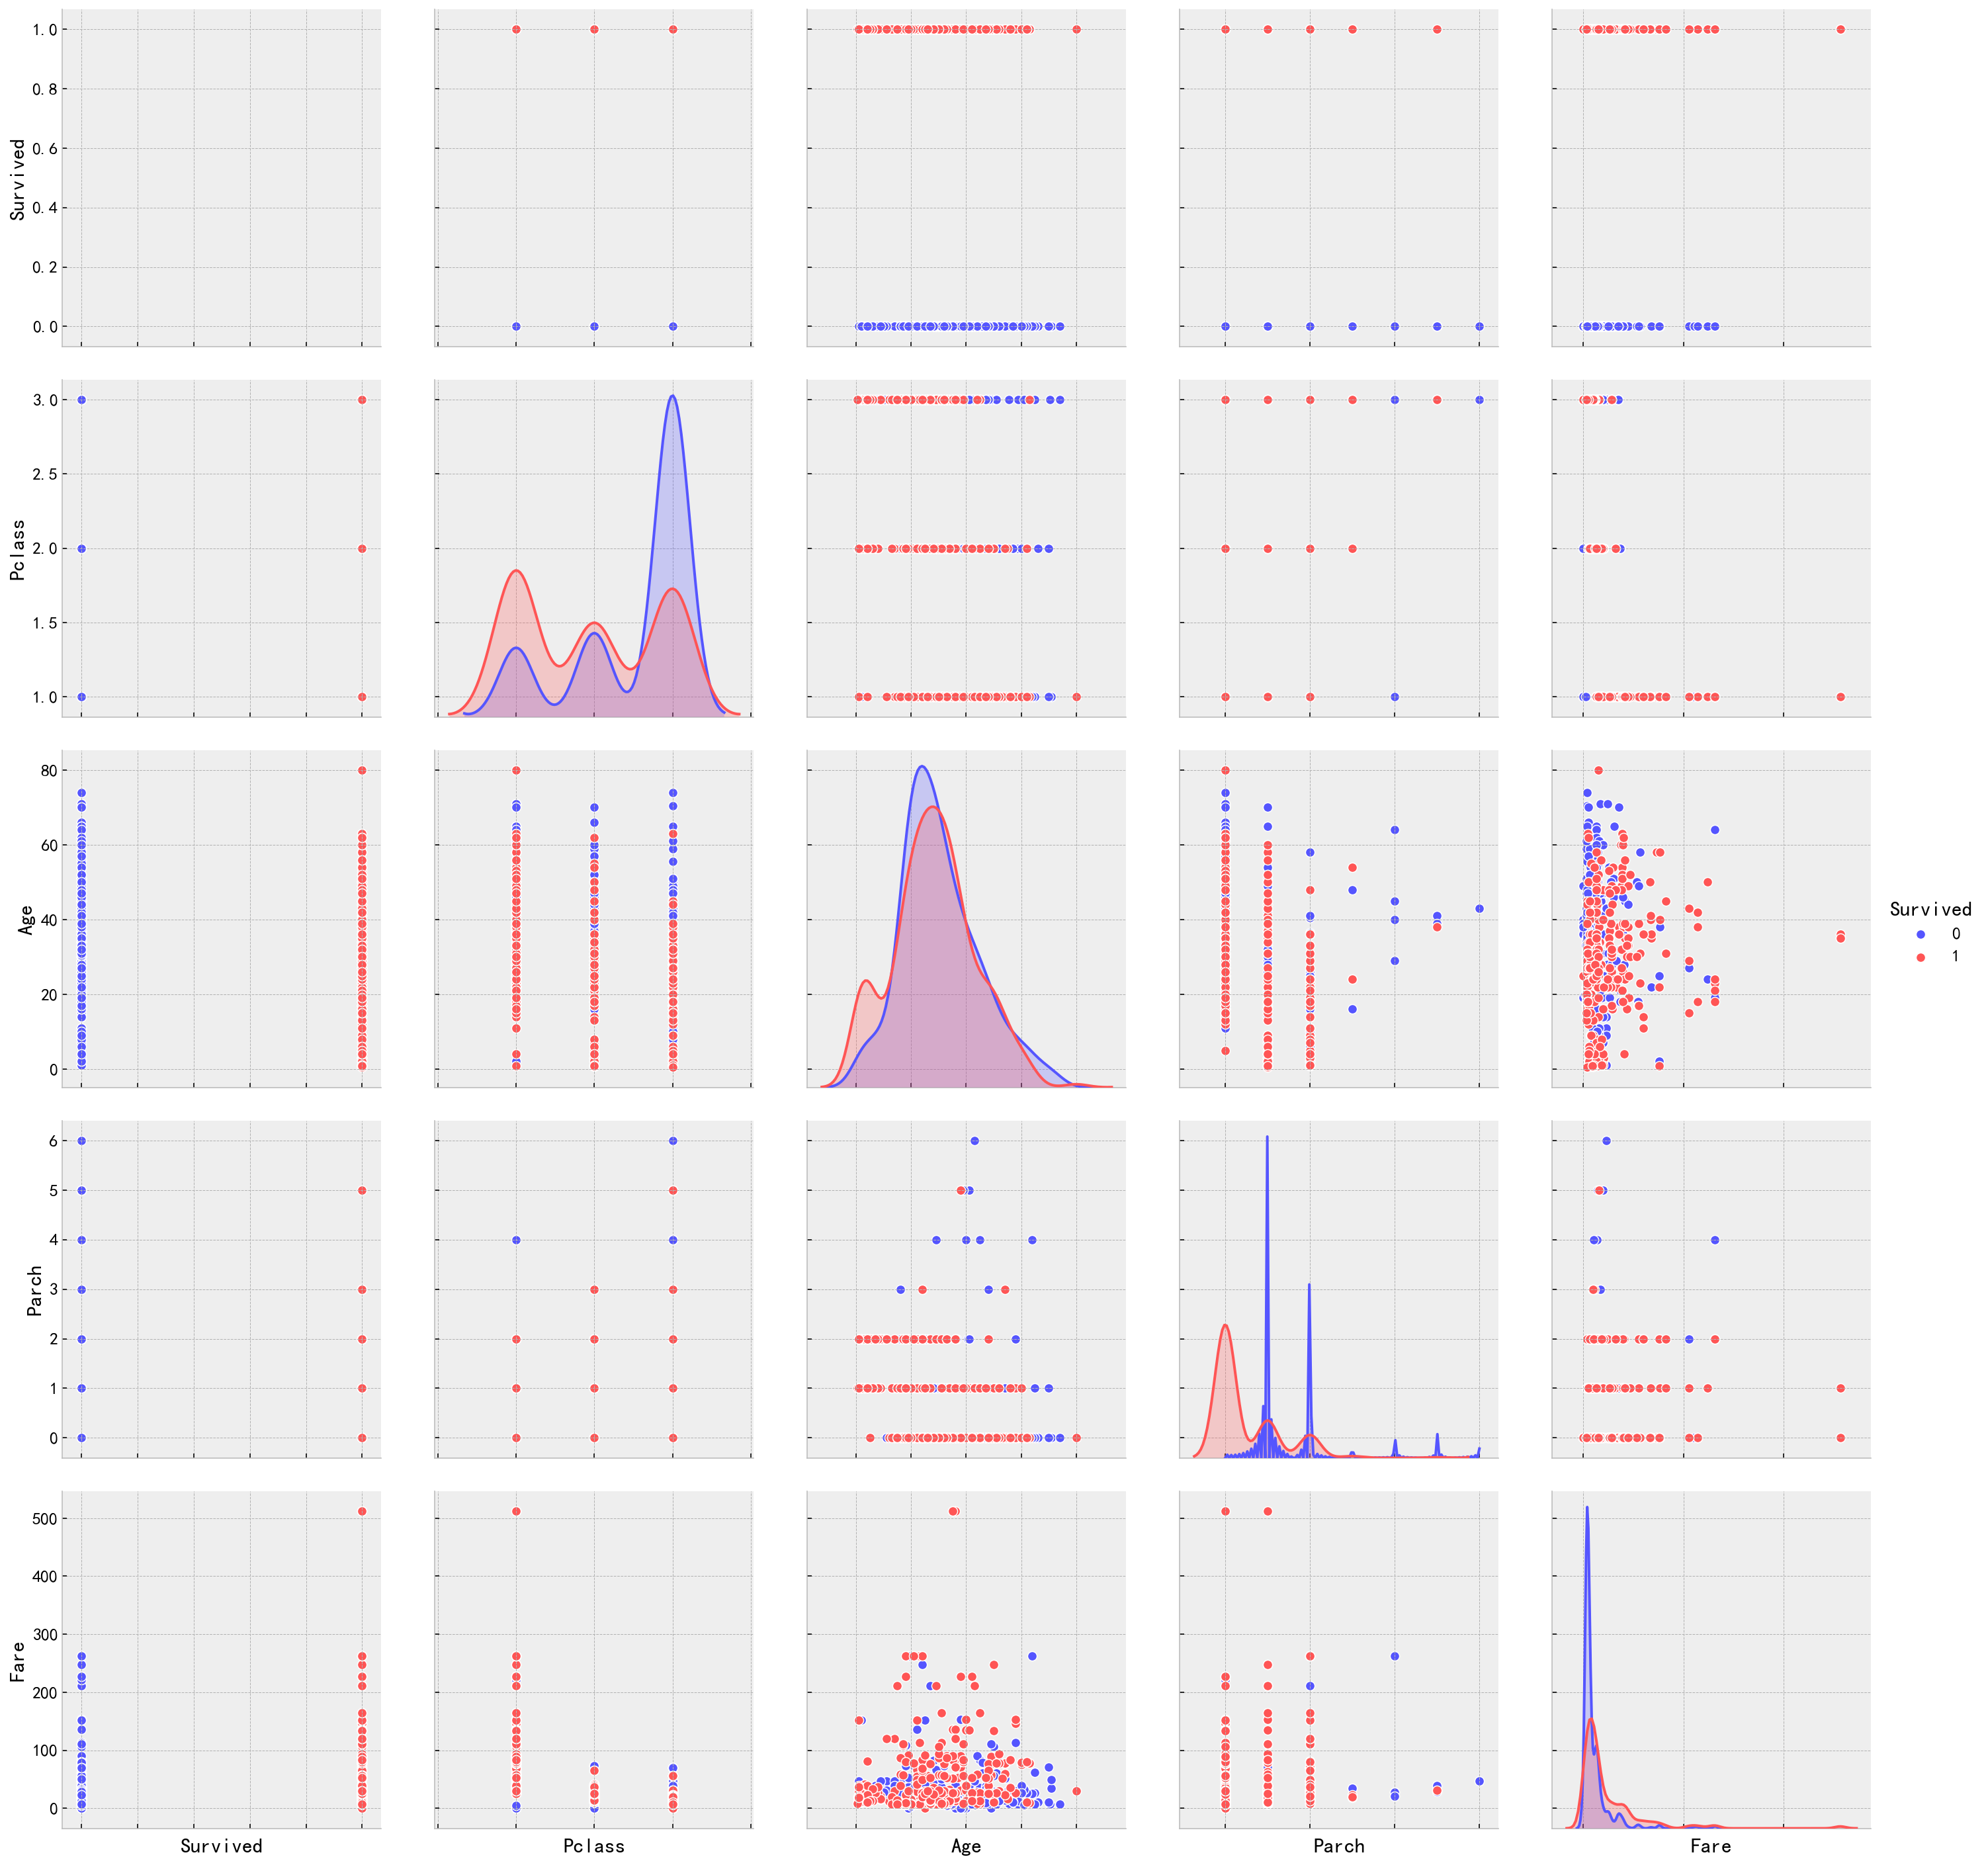

In [14]:
g = sns.pairplot(
    data_train[[
        'Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'
    ]],
    hue='Survived',
    palette='seismic',
    size=4,
    diag_kind='kde',
    diag_kws=dict(shade=True),
    plot_kws=dict(s=50))
g.set(xticklabels=[])